In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('entropy.csv')
data.head()

,name,age,apple_pie,potato_salad,sushi,midwest
0,jeff,32,0,1,1,1
1,pete,25,1,1,0,1
2,anne,33,1,1,0,1
3,natalie,26,0,0,1,1
4,stella,30,1,1,1,1


In [34]:
def calculate_gini_i(df, split_name, split_value, target_name):
    denom = len(df[df[split_name] == split_value])
    gini_value = 1 - (len(df[(df[split_name] == split_value) & (df[target_name] == 1)])/denom)**2 - (len(df[(df[split_name] == split_value) & (df[target_name] == 0)])/denom)**2
    return gini_value

In [35]:
def calculate_gini(df, split_name, target_name):
    values = list(df[split_name].unique())
    size = len(df)
    gini_total = 0
    for i in values:
        gini_i = calculate_gini_i(df, split_name, i, target_name) 
        gini_total += gini_i*(len(df[df[split_name] == i])/size) 
    return gini_total

In [43]:
def calculate_lowest_gini(df, split_names_list, target_name):
    lowest_gini = 1
    best_feature = ' '
    for feature in split_names_list:
        gini = calculate_gini(df, feature, target_name)
        if gini < lowest_gini:
            lowest_gini = gini
            best_feature = feature
    print(f'Best feature: {best_feature}')
    print(f'Gini {gini}')
    return best_feature

In [45]:
split_feature = calculate_lowest_gini(data, ['apple_pie', 'potato_salad', 'sushi'], 'midwest')

Best feature: sushi
Gini 0.31851851851851853


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)

In [66]:
x = data[['apple_pie', 'potato_salad', 'sushi']]
y = data.midwest
model.fit(x, y)

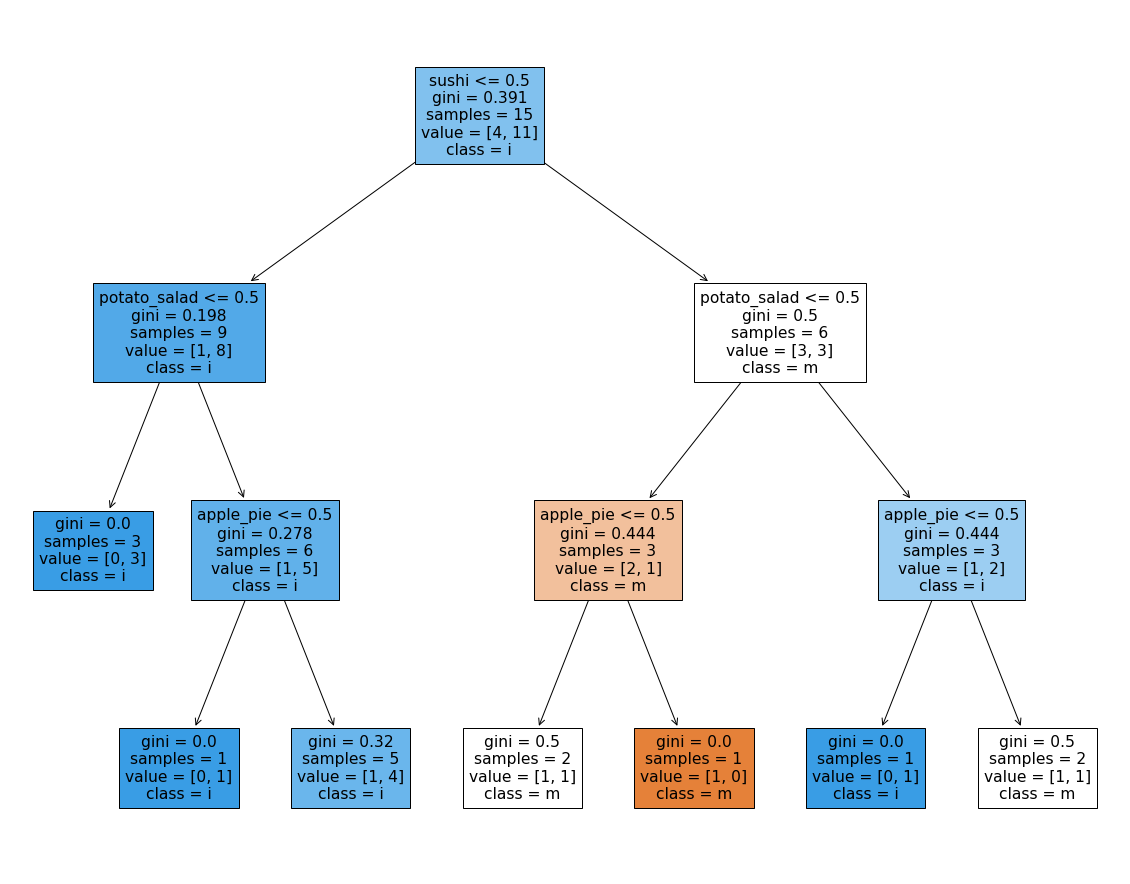

In [77]:
fig = plt.figure(figsize=(20,16))
tree.plot_tree(model, feature_names=['apple_pie', 'potato_salad', 'sushi'], class_names='midwest', filled=True)
plt.show()